
<a id="top"></a>
- [Overview](#overview)
- [MONTHS_BALANCE](#months-balance)
- [STATUS](#status)
- [STATUS & MONTHS BALANCE](#status-months-balance)

## Prepare

In [2]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

bur = feather.read_dataframe('../input/bureau.feather')
app_trn = feather.read_dataframe('../input/application_train.feather')
app_bur = bur.merge(app_trn, on="SK_ID_CURR", how="left")
bur_bal = feather.read_dataframe('../input/bureau_balance.feather')
app_bur_bal = app_bur.merge(bur_bal, on="SK_ID_BUREAU", how="left")

In [15]:
def target_bar(df, col, title=None):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    t0 = df0[col].value_counts().rename(col + '0')
    t1 = df1[col].value_counts().rename(col + '1')
    t = pd.concat([t0, t1], axis=1).fillna(0).astype(int)
    t['total'] = t.sum(axis=1)
    t.sort_values('total', inplace=True, ascending=False)
    t.drop(columns=['total'], inplace=True)

    idx = np.arange(len(t))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    p1 = ax.bar(idx, t[col + '0'], width)
    p2 = ax.bar(idx+width, t[col + '1'], width)
    ax.legend((p1[0], p2[0]), ('Target=0', 'Target=1'))
    ax.set_title(title)
    ax.set_xticks(idx + width / 2)
    ax.set_xticklabels(t.index.values, rotation=45)

    plt.show()
    

def target_hist(df, col, title):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df0[col].dropna(), ax=axes[0], color='b')
    axes[0].set_title('Target=0')
    sns.distplot(df1[col].dropna(), ax=axes[1], color='orange')
    axes[1].set_title('Target=1')
    fig.suptitle(title)
    plt.show()

<a id='overview'></a>
## Overview

In [7]:
bur_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
bur_bal[bur_bal.SK_ID_BUREAU == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


同じIDに対して27のログがあるけど何なんだろう

In [9]:
bur_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [10]:
bur_bal.notnull().sum() / len(bur_bal)

SK_ID_BUREAU      1.0
MONTHS_BALANCE    1.0
STATUS            1.0
dtype: float64

nullなし

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='months-balance'></a>
## MONTHS_BALANCE

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


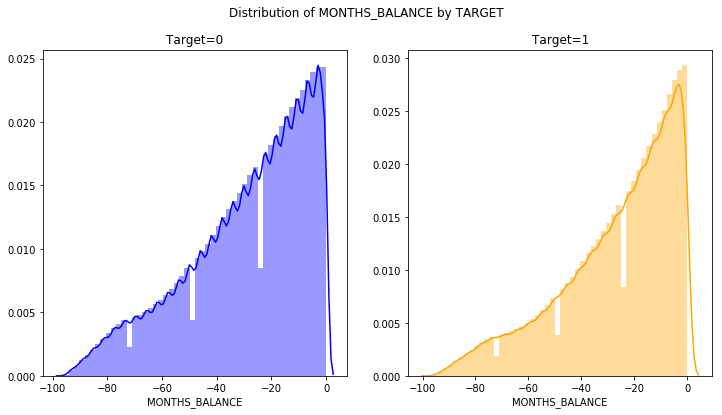

In [11]:
target_hist(app_bur_bal, 'MONTHS_BALANCE', "Distribution of MONTHS_BALANCE by TARGET")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='status'></a>
## STATUS

description : Status of Credit Bureau loan during the month (active, closed, DPD0-30,�[C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,�5 means DPD 120+ or sold or written off ] )

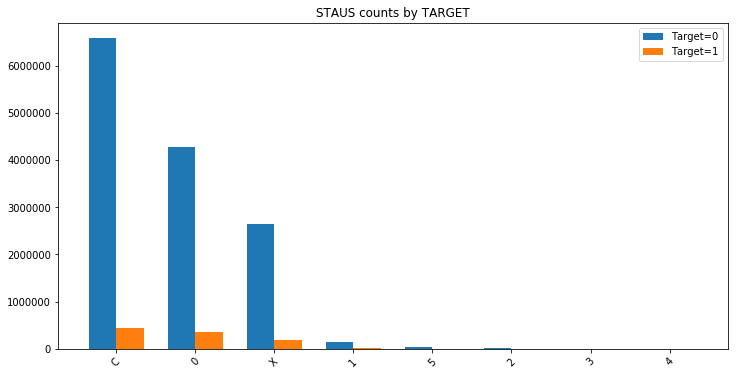

In [16]:
target_bar(app_bur_bal, "STATUS", "STATUS counts by TARGET")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='status-months-balance'></a>
## STATUS & MONTHS_BALANCE

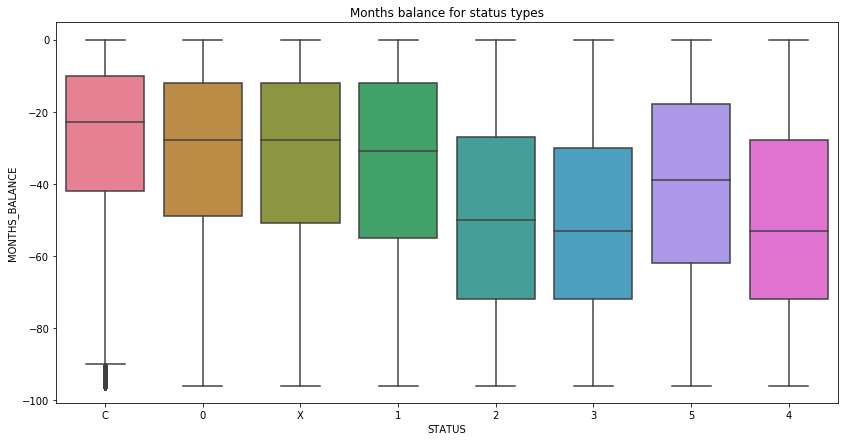

In [13]:
plt.figure(figsize=(14, 7))
sns.boxplot(y=bur_bal["MONTHS_BALANCE"], x=bur_bal["STATUS"], palette="husl")
plt.title("Months balance for status types")
plt.show()

<div style="text-align: right;">
[back to top](#top)
</div>